In [1]:
from os import listdir
import os, os.path as osp
from PIL import Image, ImageDraw
from tqdm import tqdm
import ast

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from matplotlib import animation, rc
rc('animation', html='jshtml')

In [2]:
# Init path 
root_path_data = "./assets/mvadlmi/"
annotations = osp.join(root_path_data, "train.csv")

# Check annotations
df_train_raw = pd.read_csv(annotations)
# Check images
df_train_raw.head()

,image_id,data_provider,isup_grade,gleason_score
0,995df9b93db1e396b57692c6c7f1d673,radboud,0,negative
1,86d4621be3deca4f8d461e3abce7d585,radboud,4,4+4
2,e2578d331ae6cb3bc649027498c8ff8d,radboud,1,3+3
3,c65fcde885b4f231d03cefb0fc75f4fa,radboud,4,4+4
4,c4bbe05f5d77f1a42bc95191285ab1bb,radboud,3,4+3


In [3]:
import seaborn as sns
import matplotlib as mpl

## Data exploration

### Distribution over providers

/home/younesbelkada/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


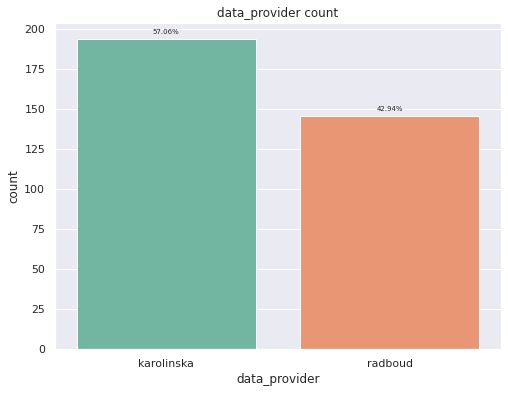

In [20]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center", fontsize="xx-small") 
    sns.set(font_scale=1.0)
    plt.show()

plot_count(df=df_train_raw, feature='data_provider', title = 'data_provider count')

### Distribution over classes

/home/younesbelkada/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


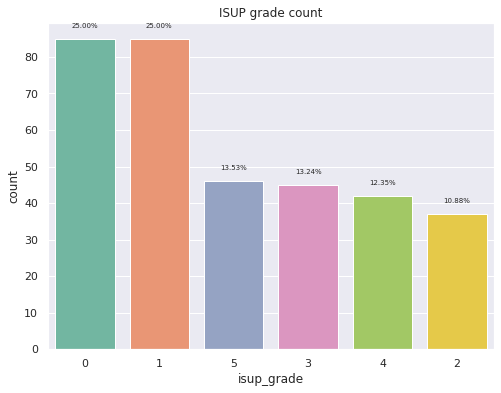

In [21]:
plot_count(df=df_train_raw, feature='isup_grade', title = 'ISUP grade count')

### Gleason score distribution 

/home/younesbelkada/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


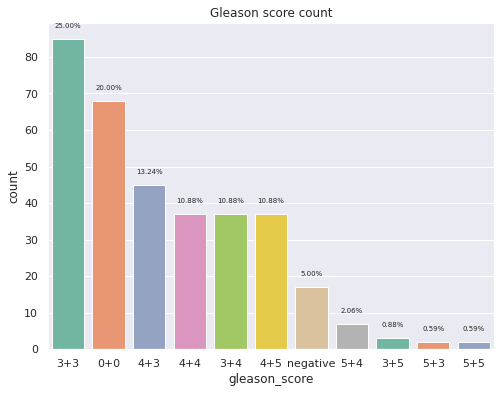

In [22]:
plot_count(df=df_train_raw, feature='gleason_score', title = 'Gleason score count')

## Relative distributions

In [25]:
def plot_relative_distribution(df, feature, hue, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(x=feature, hue=hue, data=df, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    sns.set(font_scale=1.0)
    plt.show()

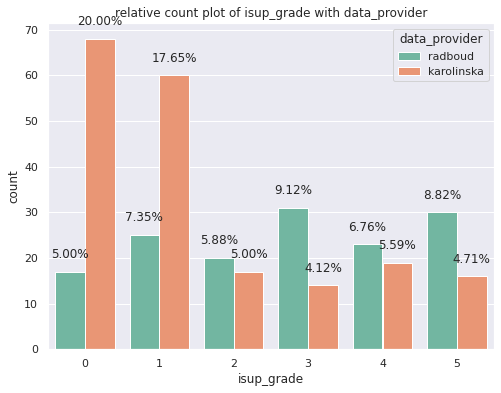

In [26]:
plot_relative_distribution(df=df_train_raw, feature='isup_grade', hue='data_provider', title = 'relative count plot of isup_grade with data_provider', size=2)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


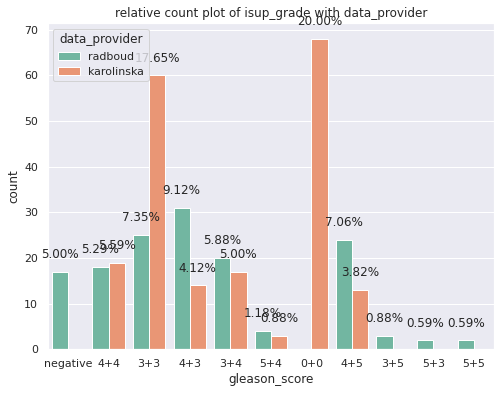

In [27]:
plot_relative_distribution(df=df_train_raw, feature='gleason_score', hue='data_provider', title = 'relative count plot of isup_grade with data_provider', size=2)